In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import itertools
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

from os.path import join, exists, isfile, isdir
from os import makedirs, listdir

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('font', **font)

In [3]:
#datasets = ["breast", "ads", "adult", "farm", "mnist17", "mnist49", "mnist56"]
datasets = ["ads"]
#experiments = ["baseline", "greedy_kernel", "landmarks_based"]
experiments = ["greedy_kernel"]

### Loading results

In [4]:
results_path = join(".", "results")
output_path = join(".", "results", "fig")
if not(exists(output_path)): makedirs(output_path)

In [5]:
def load_dir_results(dir_path):
    dir_results = []
    for f in [f for f in listdir(dir_path) if (isfile(join(dir_path, f)) and f.endswith(".pkl"))]:
        with open(join(dir_path, f), 'rb') as in_file:
            dir_results += pickle.load(in_file)
                
    for d in [d for d in listdir(dir_path) if isdir(join(dir_path, d))]:
        dir_results += load_dir_results(join(dir_path, d))
    
    return dir_results

def load_results(results_path):
    # Loading
    results = []
    for exp in set(listdir(results_path)).intersection(experiments):
        results += load_dir_results(join(results_path, exp))
    results = pd.DataFrame(results)
    return results

In [6]:
results_file = join(output_path, "results.pkl")
if not exists(results_file):
    results = load_results(results_path)
    with open(results_file, 'wb') as out_file:
        pickle.dump(results, out_file)
        
with open(results_file, 'rb') as in_file:
    results = pickle.load(in_file)
results = load_results(results_path)
results_per_dataset = {d:results.loc[results.dataset == d] for d in datasets}

results_per_dataset

{'breast':    dataset     exp   algo         C     D      N    gamma   beta  train_error  \
 0   breast  greedy  PBRFF   1000.00     1  20000  0.00001   10.0     0.626471   
 1   breast  greedy  PBRFF    100.00    10  20000  0.00001   10.0     0.052941   
 2   breast  greedy  PBRFF   1000.00    25  20000  0.00001   10.0     0.044118   
 3   breast  greedy  PBRFF    100.00    50  20000  0.00001   10.0     0.044118   
 4   breast  greedy  PBRFF    100.00   100  20000  0.00001   10.0     0.044118   
 ..     ...     ...    ...       ...   ...    ...      ...    ...          ...   
 65  breast  greedy  PBRFF  10000.00   250  20000  0.00001  100.0     0.114706   
 66  breast  greedy  PBRFF      0.01   350  20000  0.00001  100.0     0.108824   
 67  breast  greedy  PBRFF  10000.00   500  20000  0.00001  100.0     0.067647   
 68  breast  greedy  PBRFF    100.00   750  20000  0.00001  100.0     0.064706   
 69  breast  greedy  PBRFF    100.00  1000  20000  0.00001  100.0     0.064706   
 
    

# Greedy Kernel Learning

In [7]:
for d in datasets:
    print(d)
    r = results_per_dataset[d]
    print(r)
    with open("/Users/jacobcomeau/Desktop/resultat_PBRFF_BASE_BO.pkl", 'wb') as out_file:
        pickle.dump(results, out_file)


breast
   dataset     exp   algo         C     D      N    gamma   beta  train_error  \
0   breast  greedy  PBRFF   1000.00     1  20000  0.00001   10.0     0.626471   
1   breast  greedy  PBRFF    100.00    10  20000  0.00001   10.0     0.052941   
2   breast  greedy  PBRFF   1000.00    25  20000  0.00001   10.0     0.044118   
3   breast  greedy  PBRFF    100.00    50  20000  0.00001   10.0     0.044118   
4   breast  greedy  PBRFF    100.00   100  20000  0.00001   10.0     0.044118   
..     ...     ...    ...       ...   ...    ...      ...    ...          ...   
65  breast  greedy  PBRFF  10000.00   250  20000  0.00001  100.0     0.114706   
66  breast  greedy  PBRFF      0.01   350  20000  0.00001  100.0     0.108824   
67  breast  greedy  PBRFF  10000.00   500  20000  0.00001  100.0     0.067647   
68  breast  greedy  PBRFF    100.00   750  20000  0.00001  100.0     0.064706   
69  breast  greedy  PBRFF    100.00  1000  20000  0.00001  100.0     0.064706   

    val_error  test_

findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
breast


findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

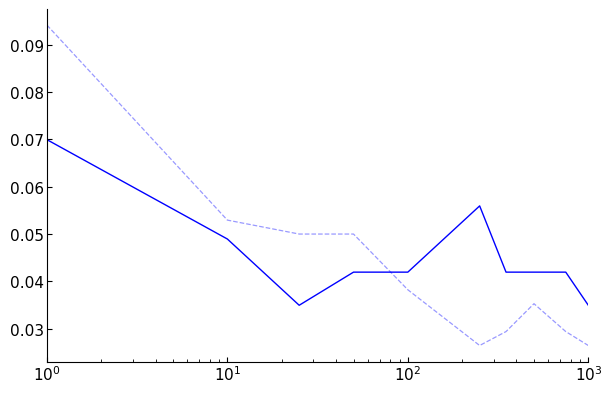

In [8]:
N = 20000
max_D = 5000

%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)
for d in datasets:
    print(d)
    r = results_per_dataset[d]

    # # SVM
    # svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
    # plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1, label="SVM RBF")

    # # RFF
    # r_rff = r.loc[r.algo == 'RFF'].loc[r.D <= max_D].set_index('D')
    # plt.semilogx(r_rff['train_error'], "--", label=f"RFF-train",color ='g', linewidth=0.9, alpha=0.4)
    # plt.semilogx(r_rff['test_error'], "-", label=f"RFF-test", color ='g', linewidth=1.1)
    
    # # Optimized Kernel RFF
    # r_okrff = r.loc[r.algo == 'OKRFF'].loc[r.D <= max_D]
    # r_okrff = r.loc[r_okrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    # plt.semilogx(r_okrff['train_error'], "--", label=f"OKRFF-train", color ='y', linewidth=0.9,alpha=0.4)
    # plt.semilogx(r_okrff['test_error'], "-", label=f"OKRFF-test", color ='y', linewidth=1)
    
    # PAC-Bayes RFF
    r_pbrff = r.loc[r.algo == 'PBRFF'].loc[r.D <= max_D].sort_values('beta', ascending=False)
    r_pbrff = r.loc[r_pbrff.groupby(['D'])["val_error"].idxmin()].set_index('D')
    plt.semilogx(r_pbrff['train_error'], "--", label=f"PBRFF-train", color ='b', linewidth=0.9,alpha=0.4)
    plt.semilogx(r_pbrff['test_error'], "-", label=f"PBRFF-test", color ='b', linewidth=1)
    
    sns.despine(top=True, right=True)
    if d in ["mnist49", "mnist17"]:
        leg = plt.legend(frameon=True, fontsize='x-large')
        leg_lines = leg.get_lines()
        plt.setp(leg_lines, linewidth=1.3)
    plt.tight_layout()
    plt.autoscale(enable=True, axis='x', tight=True)
    tick_params(axis='both', which='both', pad=2, direction='in', labelsize=11)
    plt.savefig(join(output_path, f"error_vs_features_{d}.pdf"))
    plt.show()

# Landmarks-Based Learning

####  Test error of the landmarks-based approach

In [9]:
# landmarks_method = 'clustering'
# perc_landmarks = 0.1
# beta = 1
# D = 64

# ### SVM ###
# svm_results = pd.DataFrame(results.loc[results.algo == 'SVM'].set_index('dataset')['test_error'])\
#                                                              .rename(columns={'test_error': 'svm'})

# ### RBF ###
# rbf_results = pd.DataFrame(results.loc[(results.algo == 'RBF') & \
#                                        (results.perc_landmarks == perc_landmarks) & \
#                                        (results.method == landmarks_method)] \
#                                        .set_index('dataset')['test_error']) \
#                                        .rename(columns={'test_error': 'rbf'})

# ### PAC-Bayes ###
# pb_results = results.loc[(results.algo == 'PB') & (results.perc_landmarks == perc_landmarks) & \
#                          (results.method == landmarks_method)].sort_values('beta', ascending=True)

# # beta and D optimized on validation set

# pb_results_optimized = pd.DataFrame(pb_results.loc[pb_results.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                                   .rename(columns={'test_error': 'pb'})

# # beta fixed, D optimized on validation set
# pb_results_beta = pb_results.loc[pb_results.beta == beta]
# pb_results_beta = pd.DataFrame(pb_results_beta.loc[pb_results_beta.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                                   ["val_error"].idxmin()].set_index('dataset')['test_error'])\
#                                                   .rename(columns={'test_error': 'pb_beta'})

# # beta optimized on validation set, D fixed
# pb_results_D = pb_results.loc[pb_results.D == D]
# pb_results_D = pd.DataFrame(pb_results_D.loc[pb_results_D.groupby(['method', 'perc_landmarks', 'dataset']) \
#                                             ["val_error"].idxmin()].set_index('dataset')['test_error']) \
#                                             .rename(columns={'test_error': 'pb_D'})


# table = svm_results.join(rbf_results).join(pb_results_optimized).join(pb_results_beta).join(pb_results_D)
# table = (100*table).round(2).sort_index()
# print(table.to_latex())

#### Behavior of the Landmarks-based approach according to the percentage of training points selected as landmarks

In [10]:
# %pylab inline
# pylab.rcParams['figure.figsize'] = (7, 5)
# for d in datasets:
#     print(f"Dataset: {d}")
#     r = results_per_dataset[d]
    
#     ### SVM ###
#     svm_error = list(r.loc[r.algo == 'SVM']['test_error'])[0]
#     plt.axhline(y=svm_error, color='r', linestyle='-', linewidth=1.2, label="SVM RBF")
    
#     ### RBF ###
#     r_rbf = r.loc[r.algo == 'RBF'].sort_values('perc_landmarks')
#     for method in r_rbf.method.unique():
#         plt.plot(r_rbf.loc[r_rbf.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"RBF Landmarks" + ("-R" if method == "random" else "-C"),
#                  color = 'g',
#                  linewidth=1)
        
#     ### PAC-Bayes ###
#     r_pb = r.loc[r.algo == 'PB'].sort_values('perc_landmarks', ascending=False).sort_values('beta', ascending=True)

#     # Selecting beta and D based on error on the validation set
#     r_pb = r_pb.loc[r_pb.groupby(['method', 'perc_landmarks'])["val_error"].idxmin()]
#     for method in r_pb.method.unique():
#         plt.plot(r_pb.loc[r_pb.method == method].set_index(['perc_landmarks'])['test_error'], 
#                  '--' if method == "random" else "-", 
#                  label=f"PB Landmarks"  + ("-R" if method == "random" else "-C"),
#                  color = 'b',
#                  linewidth = 1)

#     plt.xlabel("Percentage of landmarks", fontsize=14)
#     plt.ylabel("Misclassification error", fontsize=14)
#     sns.despine(top=True, right=True)
#     plt.tight_layout()
#     plt.autoscale(enable=True, axis='x', tight=True)
#     plt.tick_params(axis='both', which='both', pad=3, direction='out', labelsize=12)
#     if d == "farm":
#         plt.legend(frameon=True, fontsize='large')
#     elif d == "ads":
#         plt.legend(frameon=True, fontsize='large',loc=(0.64, 0.32))
#     plt.savefig(join(output_path, f"error_landmarks_{d}.pdf"))
#     plt.show()